In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
from tensorflow.keras.models import load_model

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [6]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

<h3 style='color:purple'>Using CNN for classification</h3>

In [7]:
# model = keras.Sequential([
    
#     layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     keras.layers.Dropout(0.25),
    
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     keras.layers.Dropout(0.25),
#     layers.Dense(256, activation='relu'),
#     keras.layers.Dropout(0.25),
#     layers.Dense(10, activation='softmax')
# ])

In [8]:
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

In [9]:
# model.evaluate(X_test,y_test)

In [10]:
# model.save('Digit Recognition - OpenCv and Keras.h5')

In [11]:
model = load_model('Digit Recognition - OpenCv and Keras.h5')

In [12]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0304 - accuracy: 0.9914


[0.030438315123319626, 0.9914000034332275]

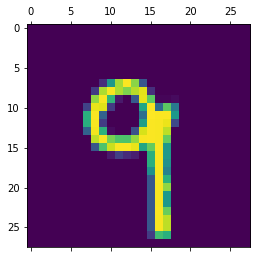

In [13]:
plt.matshow(X_test[1255])

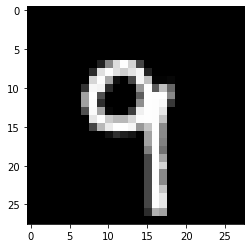

In [14]:
plt.imshow(X_test[1255].reshape(28,28), cmap='gray')

In [15]:
y_test[1255]

9

In [16]:
np.argmax(model.predict(X_test)[1255])

9

## Using cv2 for capturing image

In [21]:
# cap = cv2.VideoCapture(0)

In [22]:
# while True:
#     ret, img = cap.read()
#     img = cv2.flip(img, 1)
#     img = img[200:400, 200:400]
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     _ , gray = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
#     cv2.imshow("grey_wind", gray)
#     gray = cv2.resize(gray, (28,28))
#     # cv.imshow('resized')
#     gray = gray.reshape(1,28,28,1)
#     result = np.argmax(model.predict(gray))
#     result = 'cnn : {}'.format(result)
#     cv2.putText(img, org=(25,25), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, text = result, color=(255,0,0), thickness=1)
#     cv2.imshow("image", img)
    
#     if cv2.waitKey(1) == 13:
#         break
        
# cap.release()
# cv2.destroyAllWindows()
# plt.imshow(img)

##  Prediction via paints

In [26]:
### glob
run = False
ix,iy = -1,-1
follow = 25
img = np.zeros((512,512,1))

In [27]:
### func
def draw(event, x, y, flag, params):
    global run,ix,iy,img,follow
    if event == cv2.EVENT_LBUTTONDOWN:
        run = True
        ix, iy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if run == True:
            cv2.circle(img, (x,y), 20, (255,255,255), -1)

    elif event == cv2.EVENT_LBUTTONUP:
        run = False
        cv2.circle(img, (x,y), 20, (255,255,255), -1)
        gray = cv2.resize(img, (28, 28))
        gray = gray.reshape(1, 28, 28, 1)
        result = np.argmax(model.predict(gray))
        result = 'cnn : {}'.format(result)
        cv2.putText(img, org=(25,follow), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, text= result, color=(255,0,0), thickness=1)
        follow += 25
    elif event == cv2.EVENT_RBUTTONDOWN:
        img = np.zeros((512,512,1))
        follow = 25

In [28]:
### param
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw)
while True:    
    cv2.imshow("image", img)
   
    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()